In [4]:
!pip install tensorflow==2.0

     |████████████████████████████████| 86.3MB 47kB/s 
     |████████████████████████████████| 3.8MB 48.4MB/s 
     |████████████████████████████████| 450kB 45.8MB/s 
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow~=2.1.0, but you'll have tensorflow 2.0.0 which is incompatible.
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow-addons~=0.7.0, but you'll have tensorflow-addons 0.8.3 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [1]:
#Import the dataset from google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
## Include necessary imports
import numpy as np
import pandas as pd
import tensorflow as tf
import h5py
import matplotlib.pyplot as plt

# Using Tensorflow Keras instead of the original Keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [3]:
print(tf.__version__)        # checking the tensorflow version

2.0.0


In [0]:
f= h5py.File('/content/drive/My Drive/Colab Notebooks/SVHN_single_grey1-2.h5', 'r')  ## Opens the file in reading mode

In [5]:
datasets=list(f.keys()) #Gets the names of the datasets in the file
for n in datasets:        
  print(n, f[n].shape)

X_test (18000, 32, 32)
X_train (42000, 32, 32)
X_val (60000, 32, 32)
y_test (18000,)
y_train (42000,)
y_val (60000,)


In [0]:
X_test = f['X_test']
X_train = f['X_train']
X_val = f['X_val']
y_test = f['y_test']
y_train = f['y_train']
y_val = f['y_val']

In [0]:
#f.close()

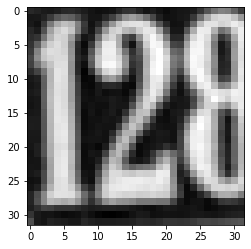

It recognises digit : 2


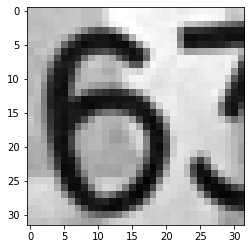

It recognises digit : 6


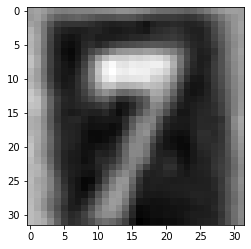

It recognises digit : 7


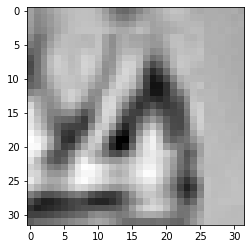

It recognises digit : 4


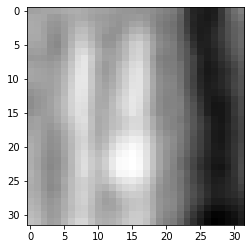

It recognises digit : 4


In [8]:
# Plot / Visulaize some of the images in the training set

for i in range(5):
  plt.imshow(X_train[i],cmap='gray')
  plt.show()
  print("It recognises digit :", y_train[i])

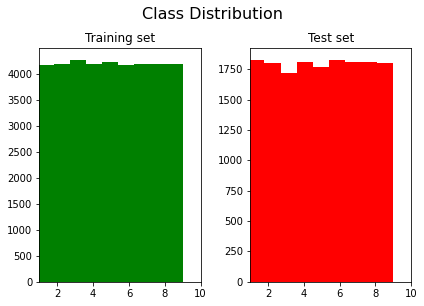

In [9]:
fig, (ax1,ax2)= plt.subplots(1,2, sharex=True)
plt.suptitle('Class Distribution', y=1.05, size=16)

ax1.hist(y_train, color='g' ,bins=10)
ax1.set_title("Training set")
ax1.set_xlim(1, 10)

ax2.hist(y_test, color='r', bins=10)
ax2.set_title("Test set")

fig.tight_layout()

##No skews in the class data

In [10]:
X_train.shape

(42000, 32, 32)

In [0]:
# Scale the data

# Calculate the mean on the training data
train_mean = np.mean(X_train, axis=0)

# Calculate the std on the training data
train_std = np.std(X_train, axis=0)

# Subtract it equally from all splits
X_train = (X_train - train_mean) / train_std
X_test = (X_test - train_mean)  / train_std
X_val = (X_val - train_mean) / train_std


In [12]:
datasets=list(f.keys()) #Gets the names of the datasets in the file
for n in datasets:        
  print(n, f[n].shape)

X_test (18000, 32, 32)
X_train (42000, 32, 32)
X_val (60000, 32, 32)
y_test (18000,)
y_train (42000,)
y_val (60000,)


In [13]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [0]:
from tensorflow import keras

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
y_val = keras.utils.to_categorical(y_val, 10)

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

In [0]:
#Reshape data from 2D to 1D -> 32x32 to 1024
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))


In [0]:
#Normalize the data

model.add(tf.keras.layers.BatchNormalization()) # adding batch normalisation layer
#Add hidden layers
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(80, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(60, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(30, activation='relu'))

#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

epochs = 120
batch_size =21000 

In [36]:
history = model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=epochs,batch_size=batch_size) #predicting accuracy on validation data
loss,accuracy  = model.evaluate(X_val, y_val, verbose=False)

Train on 42000 samples, validate on 60000 samples
Epoch 1/120
42000/42000 [==============================] - 4s 101us/sample - loss: 2.5223 - accuracy: 0.1231 - val_loss: 2.3307 - val_accuracy: 0.1133
Epoch 2/120
42000/42000 [==============================] - 3s 65us/sample - loss: 2.2732 - accuracy: 0.1860 - val_loss: 2.3165 - val_accuracy: 0.1299
Epoch 3/120
42000/42000 [==============================] - 3s 66us/sample - loss: 2.1353 - accuracy: 0.2378 - val_loss: 2.2901 - val_accuracy: 0.1510
Epoch 4/120
42000/42000 [==============================] - 3s 66us/sample - loss: 2.0237 - accuracy: 0.2881 - val_loss: 2.2610 - val_accuracy: 0.1724
Epoch 5/120
42000/42000 [==============================] - 3s 65us/sample - loss: 1.9271 - accuracy: 0.3343 - val_loss: 2.2302 - val_accuracy: 0.1989
Epoch 6/120
42000/42000 [==============================] - 3s 65us/sample - loss: 1.8387 - accuracy: 0.3785 - val_loss: 2.1934 - val_accuracy: 0.2348
Epoch 7/120
42000/42000 [========================

[0.113283336, 0.1299, 0.15101667, 0.17243333, 0.19893333, 0.2348, 0.27548334, 0.30976668, 0.35031667, 0.38526666, 0.42045, 0.45551667, 0.48025, 0.50556666, 0.5325, 0.55015, 0.5671167, 0.5847333, 0.5988, 0.62333333, 0.62795, 0.63748336, 0.6519333, 0.6562, 0.6609167, 0.6789, 0.67628336, 0.68341666, 0.6909, 0.70125, 0.7066333, 0.7123, 0.71405, 0.7176833, 0.7241833, 0.72751665, 0.73425, 0.74123335, 0.74765, 0.7503667, 0.7575167, 0.75818336, 0.7601167, 0.76098335, 0.76995, 0.77508336, 0.77325, 0.7852, 0.7851167, 0.79155, 0.7913833, 0.78706664, 0.7980667, 0.80198336, 0.80475, 0.79933333, 0.8032167, 0.80521667, 0.8091, 0.8186, 0.81915, 0.8197, 0.82015, 0.8272833, 0.8291, 0.83168334, 0.8273, 0.8293333, 0.83898336, 0.83736664, 0.8319167, 0.83075, 0.84068334, 0.8448, 0.8380167, 0.83998334, 0.83568335, 0.8418, 0.8479667, 0.8552167, 0.85193336, 0.85835, 0.8577167, 0.8574167, 0.85936666, 0.8595167, 0.85903335, 0.84891665, 0.8649333, 0.85785, 0.85315, 0.85978335, 0.86548334, 0.86501664, 0.8646, 0.86

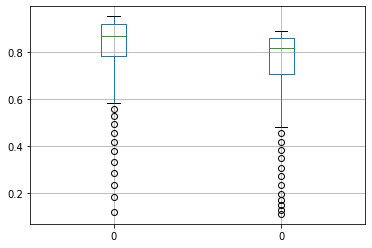

In [37]:
print(history.history['val_accuracy'])

print(history.history['accuracy'])

ta = pd.DataFrame(history.history['accuracy'])
va = pd.DataFrame(history.history['val_accuracy'])

tva = pd.concat([ta,va] , axis=1)

tva.boxplot()

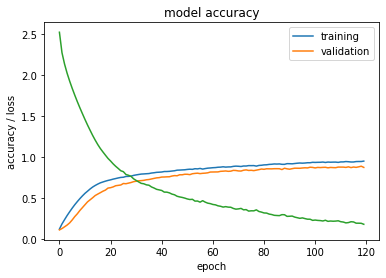

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [39]:
loss, acc = model.evaluate(X_test,y_test, verbose=2)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

18000/1 - 1s - loss: 0.6478 - accuracy: 0.7817
Accuracy: 0.782
Loss: 0.741
